In [1]:
import numpy as np
import matplotlib.pyplot as plt

## line search for adaptive step size

In [2]:
np.random.seed(0)

## Generate Data

In [3]:
n, d = 100, 3
X = np.random.rand(n, d)
X.shape

(100, 3)

In [4]:
w_gt = np.array([1,2,3])
w_gt.shape

(3,)

In [5]:
error = np.random.randn(100,1)

In [6]:
y = X @ w_gt.reshape(-1, 1) + error
y.shape

(100, 1)

In [7]:
#for w0 adding 1 for the general dimensionality purpose according to formula
X = np.hstack((np.ones((n,1)), X))

X.shape


(100, 4)

## Gradient decent
defined limitations in problems
- number of iterations (max defined)
- error diff

In [8]:
def gradient(X, y, w):
    n, d = X.shape
    grad = X.T @ ((X @ w) - y) / n
    return grad

In [9]:
X.shape

(100, 4)

In [10]:
#lets test
gradient(X, y, np.zeros((X.shape[1], 1)))

array([[-2.90928278],
       [-1.5532363 ],
       [-1.56101271],
       [-1.76752543]])

In [62]:
def gradient_descent(X,y, num_iter):
    #randomly initialize w, here we took zero but it can be anything
    n, d = X.shape
    w = np.zeros((d, 1))
    costs = [cost_function(X,y,w)]
    for _ in range(num_iter):
        step_size = line_search(X,y, w)
        w = w - step_size * gradient(X, y, w)

        costs.append(cost_function(X,y,w))
    return w, costs

In [16]:
def cost_function(X,y,w):
    y_pred = X @ w
    n, d = X.shape
    return np.sum((y - y_pred) ** 2) / (2 * n)

In [42]:
def line_search(X, y, w, alpha=0.001, beta=0.5):
    old_cost = cost_function(X,y, w)
    step_size = 10.0 #randomly to big number
    grad = gradient(X, y, w)
    new_cost = cost_function(X, y, w - step_size * grad)
    while cost_function(X, y, w - step_size * grad) > old_cost + alpha:
        step_size = beta * step_size #update stepsize with shib
    return step_size

In [64]:
w ,costs = gradient_descent(X,y, 1000)


In [54]:
w

array([[-0.07627808],
       [ 0.57724156],
       [ 1.96648145],
       [ 3.23872071]])

In [58]:
w

array([[-0.07627808],
       [ 0.57724156],
       [ 1.96648145],
       [ 3.23872071]])

In [55]:
w_mle = np.linalg.inv(X.T @ X) @ X.T @ y

In [56]:
w_mle

array([[-0.0497861 ],
       [ 0.59132477],
       [ 1.97995663],
       [ 3.25323099]])

In [70]:
#costs

In [67]:
import matplotlib.pyplot as plt

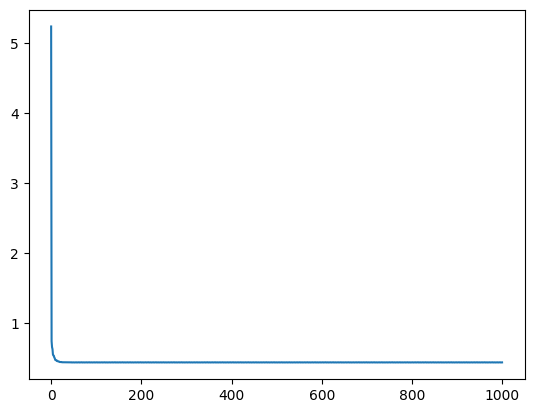

In [69]:
plt.plot(
    range(len(costs)),
    costs
)

## mini-batch gradient descent

In [2]:
np.random.seed(0)

In [5]:
 # sample, feature/dimension
X = np.random.rand(1000, 3)
y = X @ np.array([1,2,3]).reshape(-1, 1) + np.random.randn(1000, 1)

In [6]:
n, d = X.shape

In [7]:
X = np.hstack((np.ones((n, 1)), X))
X.shape

(1000, 4)

In [8]:
def cost_function(X, y, w):
    n, d = X.shape
    y_pred = X @ w
    return np.sum((y - y_pred) ** 2) / (2 * n)

In [9]:
def gradient(X, y, w):
    n,d = X.shape
    grad = X.T @ ((X @ w) - y) / n
    return grad

In [29]:
#test gradient
w_grad = gradient(X,y, np.zeros((X.shape[1], 1)))

In [10]:
def line_search(X,y,w, alpha=0.001, beta= 0.7):
    cost = cost_function(X, y, w)
    grad = gradient(X, y, w)
    step_size = 1
    while cost_function(X, y, w - step_size * grad) > cost + alpha:
        step_size = beta * step_size
    return step_size

In [13]:
def minibatch_gradient_descent1(X, y, batch_size, alpha=0.01, beta=0.7, num_epochs=1000):
    n, d = X.shape
    w = np.zeros((d, 1))
    print(f'Baseline Cost: {cost_function(X, y, w)}')

    costs = []
    for _ in range(num_epochs):
        # randomly shuffle the indices of the training data
        indices = np.random.permutation(n)
        
        # split the indices into batches of size batch_size
        for j in range(0, n, batch_size):
            batch_indices = indices[j: j + batch_size]
            X_batch = X[batch_indices]
            y_batch = y[batch_indices]
            
            # perform line search to find the optimal step size for the batch
            step_size = line_search(X_batch, y_batch, w, alpha, beta)
            
            # update the parameters using the optimal step size and search direction
            w = w - step_size * gradient(X, y, w)
    
        costs.append(cost_function(X, y, w))

    return w, costs

In [21]:
def minibatch_gradient_descent(X, y, batch_size, alpha=0.001, beta= 0.7, num_epochs=1000):
    n,d = X.shape
    w = np.zeros((d, 1))

    for _ in range(num_epochs):
        indices = np.random.permutation(n) #shuffle the data set

        for start_index in range(0 , n, batch_size):
            batch_indecies = indices[start_index: start_index + batch_size]
            X_batch = X[batch_indecies]
            y_batch = y[batch_indecies]

            step_size = line_search(X_batch,  y_batch, w,  alpha, beta)

            w = w - step_size * gradient(X_batch, y_batch, w)
    return w


In [22]:
w = minibatch_gradient_descent(X, y, num_epochs=10, batch_size=100, alpha=0.001, beta= 0.7)

In [18]:
w

array([[0.33478212],
       [0.78578462],
       [1.89611501],
       [2.89256657]])